In [1]:
import scipy as sc
import imp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from scipy.stats import norm
from scipy.integrate import quad

In [2]:
import sys

In [3]:
sys.path.append('/home/zelenyy/npm/stats/statreg-py')

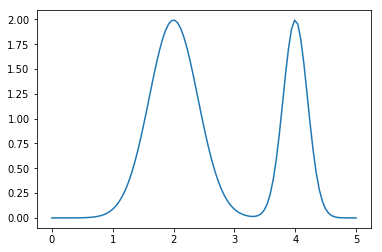

In [87]:
a = 0
b = 5

phi = lambda x: 2*norm.pdf(x-2, scale=0.4) + norm.pdf(x-4, scale = 0.2)
x = np.linspace(a, b,100)
plt.plot(x, phi(x));

In [9]:
kernel = lambda x,y : np.heaviside(x-y, 1)

In [15]:
convolution =  np.vectorize(lambda y: quad(lambda x: kernel(x,y)*phi(x), a,b)[0])

In [13]:
y = np.linspace(a, b, 50)

In [100]:
ftrue = convolution(y)

In [97]:
sig = 0.01*f +0.01

In [101]:
f = ftrue + norm.rvs(loc = ftrue, scale=sig)

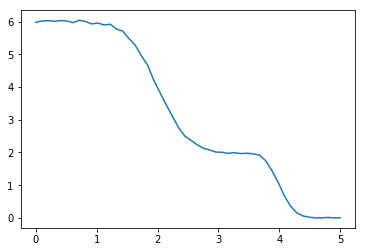

In [102]:
plt.plot(y,f)

In [79]:
import statreg
imp.reload(statreg.deconvolution)

<module 'statreg.deconvolution' from '/home/zelenyy/npm/stats/statreg-py/statreg/deconvolution.py'>

In [80]:
from statreg.deconvolution import GaussErrorMatrixUnfolder
from statreg.basis import CubicSplines

In [105]:
cubicSplines = CubicSplines(y, boundary='dirichlet')

In [106]:
omega = cubicSplines.omega(2)

In [110]:
omega.shape

(48, 48)

In [107]:
model = GaussErrorMatrixUnfolder(omega)

In [111]:
Kmn = cubicSplines.discretizeKernel(kernel,y)

In [112]:
result = model.solve(Kmn, f, sig)

In [89]:
phir = lambda x: sum([p*bf(x) for p, bf in zip(result.phi,cubicSplines.basisFun)])

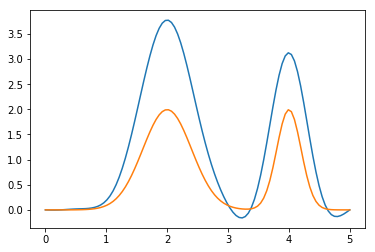

In [113]:
plt.plot(x,phir(x))
plt.plot(x,phi(x))